# Chapter 6_학습 관련 기술

<h3> 6.1 매개변수 갱신 </h3>
- 신경망 학습의 목적은 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것이다. <BR>
    > 매개변수의 최적값을 찾는 문제로 <B>최적화</B>라고 한다.<BR>
    
- 지금까지는 SGD(확률적 경사 하강법)을 이용했지만, SGD보다 똑똑한 방법을 사용

6.1.1 모험가 이야기<BR>
    - 모험가가 눈가리개와 지도를 보지 않고 제일 깊은쪽으로 갈 수 있는 방법은 <BR>
    > 서 있는 땅의 기울기를 가지고 찾아간다. <BR>
    - 이 방법이 SGD 방식
                                
                                                

6.1.2 확률적 경사 하강법(SGD)<BR>
[SGD 수식] <BR>
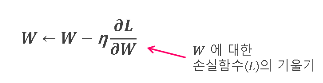
                      

W : 갱신할 가중치 매개변수 <BR>
n : 학습률 (하이퍼파라미터)<br>
aL/aW : W에 대한 손실 함수의 기울기

In [2]:
#SGD 구현
class SGD:
    def __init__(self,lr=0.01):
        self.lr = lr
    
    def update(self,params,grads):
        for key in params.keys():
            params[key] -= self.lr*grads[key]
# params,key는 딕셔너리 변수로 각각 가중치 매개변수와 기울기를 저장 중 

optimizer로 최적화를 담당하는 클래스를 분리해 구현하면 기능을 모듈화하기 좋다.<br>


6.1.3 SGD의 단점 <BR>
- 단순하고 구현도 쉽지만, 문제에 따라서는 비효율적일 때가 있다. <br>
<br>
ex_ 이 함수의 최솟값을 구하는 문제 <br>

    
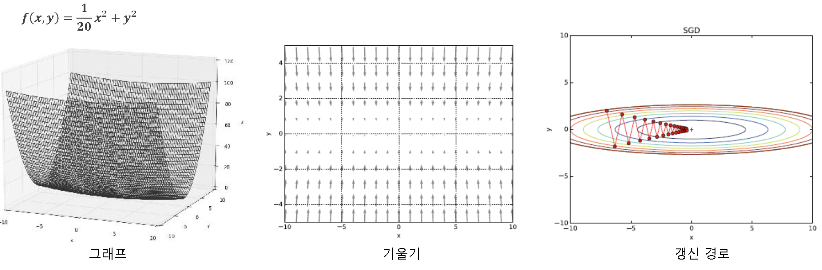 <br>
    
기울기를 보면 y축 방향은 크고, x축 방향은 작다는 것이 특징<br>
갱신경로가 상당히 비효율적인 움직임을 보여준다. <br><br>

즉, 단점은 비등방성 함수(방향에 따라 성질, 기울기가 달라지는 함수)<br>
에서는 타색 경로가 비효율성이다. <br>
- SGD가 지그재그로 탐색하는 근본 원인은 기울어진 방향이 본래의 최솟값과 다른 방향을 가리키기 때문
                              

6.1.4 모멘텀 <BR>
- 운동량을 뜻하는 단어로 , 물리와 관계가 있다.<BR>
    
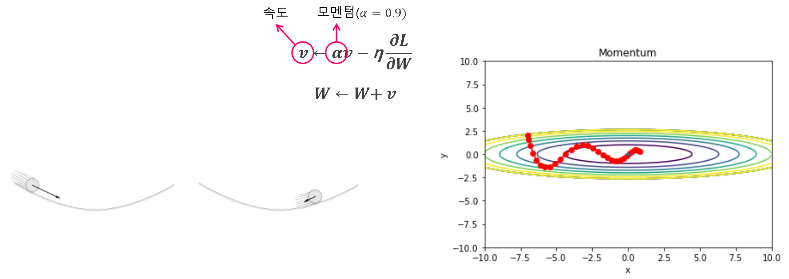    <BR>

V: 물리에서 말하는 속도(velocity)<br>
    - 기울기 방향으로 힘을 받아 물체가 가속된다는 물리 법칙 <br>
    - 아무런 힘을 받지 않을 때는 서서히 하강시킨다.
<br>
그림을 보면 SGD 보다 지그재그정도가 덜한 것을 알 수 있다. <BR>
- x축의 힘은 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속화 <br>
- y축의 힘은 크지만 위아래로 번갈아 받아서 상충하여 y축 방향의 속도는 안정적이지 않다.<br>
    > SGD보다 X축 방향으로 빠르게 다가가 지그재그 움직임이 줄어든다. 
                          

In [3]:
# 모멘텀 구현
class Momentum:
    def __init__(self,lr=0.01, momentum=0.9 ):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self,params,grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

6.1.5 AdaGrad <br>
- 학습을 진행하면서 학습률을 점차 줄여가는 방법 (학습률 감소)<br>
<br>

h : 기존 기울기 값을 제곱하여 계속 더해준다. <br>
- 1/root(h)를 곱해 학습률을 조정 <br>
> 매개변수의 원소 중에서 많이 움직인(크게 갱신된) 원소는 학습률이 낮아진다는 뜻 <br>
> - 학습률 감소가 매개 변수의 원소마다 다르게 적용

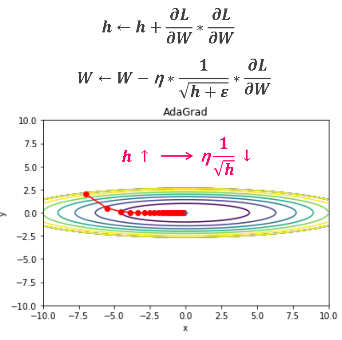 <br><br>

그림을 보면 최솟값을 향해 효율적으로 움직이는 것을 알수 있다. <br>
y축 방향은 기울기가 커서 처음에는 크게 움직이지만, 그 큰 움직임에 비례해 갱신 정도로 큰 폭으로 작아짐 <br>

<br><br>
note: <br>
AdaGrad는 과거의 기울기를 제곱하여 계속 더해진다. <br>
그래서 학습이 진행할수록 갱신 강도가 약해진다. 무한히 학습하면 갱신량이 0이 된다. <br>
이를 개선한 기법이 <b>RMSProp</b><br>
RMSProp은 먼 과거의 기울기는 서서히 잊고 새로운 기울기 정보를 크게 반영한다 <br>
지수이동평균(EMA)로 과거 기울기의 반영 규모를 기하급수적으로 감소시킴 

In [4]:
# AdaGrad 구현
class AdaGrad:
    def __init__(self,lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self,params,grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key]*grads[key]
            params[key] -= self.lr[key]*grads[key] / (np.sqrt(self.h[key])+1e-7)
            # 작은 값을 더해 self.h의 0이 담겨도 0으로 나누는 사태를 막아줌 

6.1.6 Adam <br>
- 모멘텀과 AdaGrad 기법을 융합한 방법 <br>
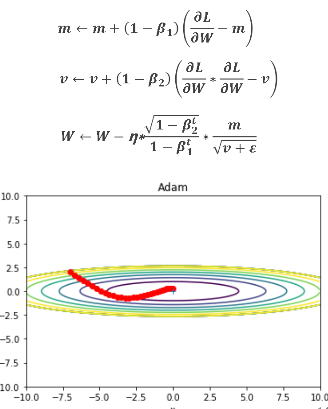 <br>

모멘텀 때보다 공의 좌우 흔들림이 적다.<br>
-> 학습의 갱신 강도를 적응적으로 조정해서 얻은 혜택 <br>
<br>
note : Adam은 하이퍼파라미터를 3개 설정함 <br>
1. 학습률 2. 일차 모멘텀용 계수 3. 이차 모멘텀용 계수  <br>
논문에 따르면  <br>
2. 일차 모멘텀용 계수 = 0.9
3. 이차 모멘텀용 계수 = 0.999 이면 많은 경우에 좋은 결과를 얻을 수 있다.

6.1.7 어느 갱신 방법을 이용할 것인가? <br>
- 풀어야할 문제가 무엇인지, 하이퍼파라미터를 어떻게 설정하느냐에 따라서도 결과가 바뀐다. <br>
- 4후보에서는 각자 장단이 있어 잘푸는 문제와 서툰 문제가 있다. 

6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교 <br>

실험 <br>
- 각 층이 100개의 뉴런으로 구성된 5층 신경망에서 ReLU를 활성화 함수로 사용해 측정<br>
- SGD의 학습 진도가 가장 느리고, AdaGrad가 제일 빠름 <br>
(주의할 점 : 하이퍼파라미터와 신경망의 구조에 따라 결과가 달라짐 )<br>

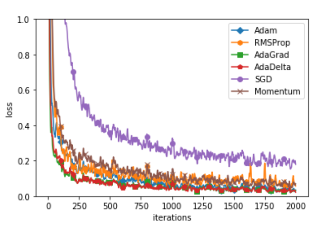

<h3> 6.2 가중치의 초깃값 </h3>

가중치의 초깃값을 무엇으로 설정하느냐가 신경망 학습의 성패가 가르는 일이 실제로 자주 있다. <br>

6.2.1 초깃값을 0으로 하면<br>
- 오버피팅을 억제해 범용 성능을 높이는 테크닉인 가중치 감소 기법에 대해 알아본다 <br>
> 가중치 감소 기법 : 가중치 매개변수의 값이 작아지도록 학습하는 방법 <br>
(가중치 값을 작게하여 오버피팅이 일어나지 않게 하는 것) <br>

가중치 작게 하기 위해 초깃값을 정규분포에서 생성되는 랜덤 값을 0.01배 한 작은 값을 사용했다.  <br>
더 작은 값인 0으로 초깃값을 하면 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문에 학습이 안된다 .<br>
> 가중치들은 같은 초깃값에서 시작하고 갱신을 거쳐도 여전히 같은 값을 유지함

6.2.2 은닉층의 활성화값 분포 <br>
- 가중치의 초깃값에 따라 은닉층 활성화값들이 어떻게 변화하는지 비교 

In [7]:
# 시그모이드 함수를 사용하는 5층 신경망에 무작위로 생성한 입력 데이터를 흘림

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.random.randn(1000,100) # 1000개의 데이터를 정규분포로 무작위로 생성 
node_num = 100 # 각 은닉층의 노드(뉴런)수
hidden_layer_size = 5 # 은닉층이 5개
activations = {} # 이곳에 활성화 결과(값)를 저장

for i in range(hidden_layer_size):
    if i != 0 :
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) *1
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z # 결과 저장 
    
# 가중치 분포에 주의 
# 표준편차를 바꿔가며 활성화값들의 분포가 어떻게 변화하는지 관찰하는 것이 이 실험의 목적
    

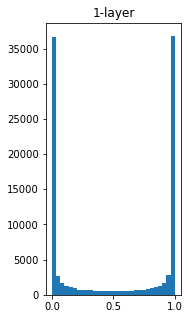

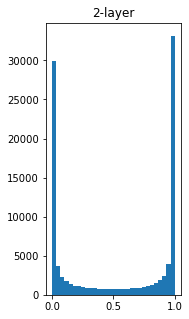

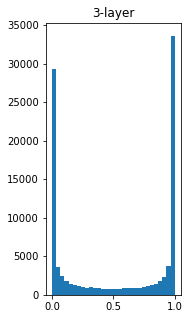

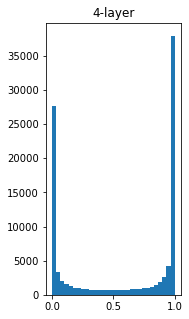

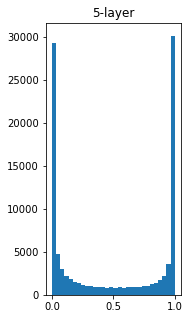

In [26]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.figure(figsize=(14,5))
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+ "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    

plt.show()

# sigmoid 함수를 이용하여 0,1에 치우쳐 분포하고 층을 깊게 쌓을 수록 역전파의 기울기 값이 점점 작아지다가 사라진다. (기울기 손실)

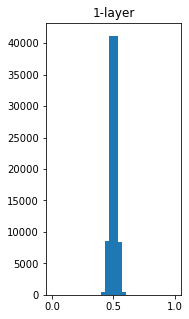

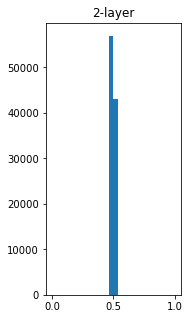

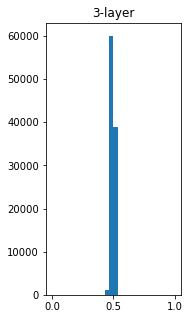

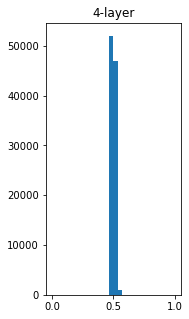

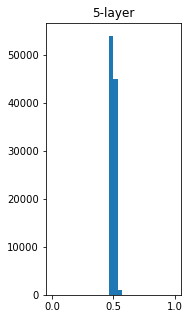

In [27]:
# 두번째 실험 가중치의 표준편차를 0.01로 바꿈

def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.random.randn(1000,100) # 1000개의 데이터를 정규분포로 무작위로 생성 
node_num = 100 # 각 은닉층의 노드(뉴런)수
hidden_layer_size = 5 # 은닉층이 5개
activations = {} # 이곳에 활성화 결과(값)를 저장

for i in range(hidden_layer_size):
    if i != 0 :
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 0.01 # 표준편차 변경 
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z
    
for i, a in activations.items():
    plt.figure(figsize=(14,5))
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+ "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    

plt.show()

0.5 부근에 집중됨 <br>
0,1로 치우쳐진않아 기울기 소실 문제는 일어나지 않았으나, 5-layer가 거의 같은 값을 출력하고 있다. <br>
이는 뉴런을 여러 개 둔 의미가 없어진다는 뜻 (표현력 제한 문제) <br>
<br>
각 층의 활성화 값은 적당히 고루 분포되어야 한다. <br>
그래서 신경망 학습이 효율적으로 이뤄진다. 

Xavier 초깃값 이용(일반적인 딥러닝 프레임워크들이 표준적으로 이용중) <br>
- 앞층에 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼진다. <br>

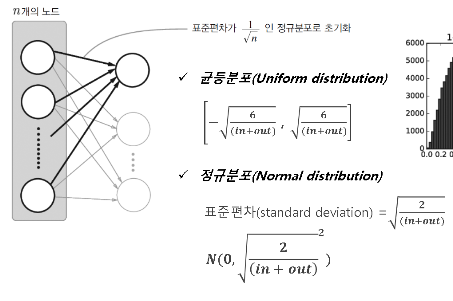

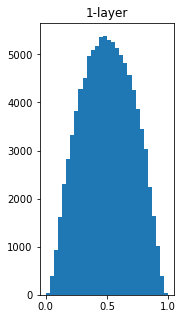

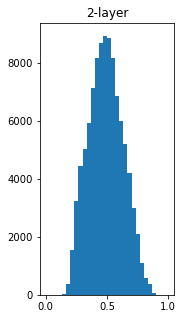

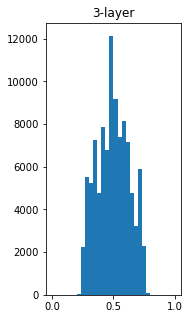

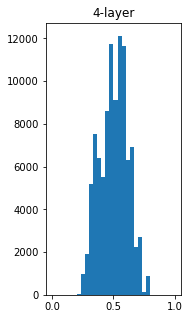

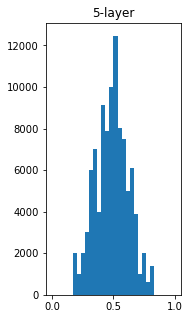

In [28]:
# Xavier 초깃값이용 

def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.random.randn(1000,100) # 1000개의 데이터를 정규분포로 무작위로 생성 
node_num = 100 # 각 은닉층의 노드(뉴런)수
hidden_layer_size = 5 # 은닉층이 5개
activations = {} # 이곳에 활성화 결과(값)를 저장

for i in range(hidden_layer_size):
    if i != 0 :
        x = activations[i-1]
        
    node_num = 100 # 앞 층의 노드 수 (모든 층의 노드 수가 100개라고 단순화함 )
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)  # 표준편차 변경 
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z
    
for i, a in activations.items():
    plt.figure(figsize=(14,5))
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+ "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    

plt.show()

note: <br>
- 밑 표를 보면 점점 오른쪽으로 갈수록 일그러지고 있다. <br>
- 이는 sigmoid 말고 tanh함수를 이용하면 개선된다. <br>
- 활성화 함수용으로는 원점에서 대칭인 함수가 바람직하다고 알려져 있다. (tanh > sigmoid)<br>

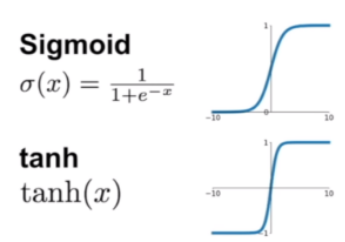

6.2.3 ReLU를 사용할 때의 가중치 초깃값 <BR>
- Xavier 초깃값은 활성화 함수가 선형인 것을 전제로 이끈 결과<br>
    (sigmoid와 tanh함수는 좌우대칭이라 중앙부근이 선형) <br>
- ReLU는 ReLU에 특화된 초깃값을 이용해야한다. (He초깃값) <br>
   표준편차가 root(2/n)인 정규분포를 사용 <br>
- 음의 영역이 때문에 더 넓게 분포시키기 위해 2배의 계수가 필요 <br>
    
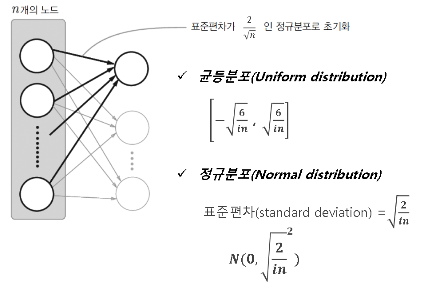 <br>
    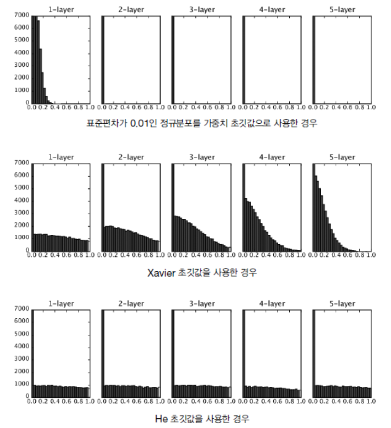

1. 표준편차가 0.01일 때는 시경망에 아주 작은 데이터가 흐른다는 것을 알 수 있고 <br>
이는 역전파 때 가중치의 기울기 역시 작아져 학습이 거의 이뤄지지않을 것이다. <br>
2. Xavier 초깃값은 점점 한쪽으로 치우쳐 학습할 때 기울기 소실 문제를 일으킴 <br>
3. He 초깃값은 모든 층에서 균일하게 분포되어 역전파 때도 적절한 값이 나올 것 <br>
<br>

> 활성화함수 ReLU를 사용할 때는 He 초깃값 <br>
> sigmoid나 tanh 등의 S자 모양 곡선일 때는 Xavier 초깃값 

6.2.4 MNIST 데이터셋으로 본 가중치 초기값 비교 <BR>
    

===========iteration:0===========
std=0.01:2.302510673263113
Xavier:2.3075758044507033
He:2.3130708879603934
===========iteration:100===========
std=0.01:2.3020629914739517
Xavier:2.2335845975239694
He:1.230718989904853
===========iteration:200===========
std=0.01:2.3013723649755904
Xavier:2.0514840820801137
He:0.5859216716217037
===========iteration:300===========
std=0.01:2.3005247068057155
Xavier:1.757864776513469
He:0.5135301356325414
===========iteration:400===========
std=0.01:2.3018941274295353
Xavier:1.1860575766337362
He:0.39777349314327193
===========iteration:500===========
std=0.01:2.3023560127514413
Xavier:0.8721769557322818
He:0.336164281917875
===========iteration:600===========
std=0.01:2.3028194993714854
Xavier:0.7187352796416704
He:0.33957353966514064
===========iteration:700===========
std=0.01:2.3018209041377973
Xavier:0.5999416501079194
He:0.27052781402990256
===========iteration:800===========
std=0.01:2.3037926048110027
Xavier:0.5311813923491707
He:0.235485277825

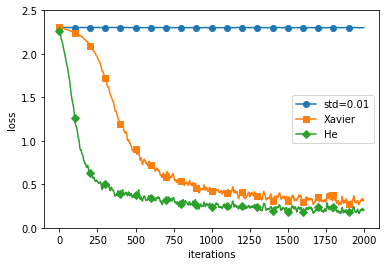

In [29]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

<B>  가중치의 초깃값은 신경망 학습에 아주 중요한 포인트이다 </B>

<H3> 6.3 배치 정규화 </H3>

가중치 초기값 설정에 의존하지 않고 각층이 활서오하 함수의 출력값을 적당히 퍼뜨리도록 강제하는 방법-> 배치 정규화

6.3.1 배치 정규화 알고리즘 <BR>
<B>주목받는 이유 </B><BR> 
    1. 학습을 빨리 진행할 수 있다. (학습 속도 개선)<BR>
    2. 초깃값에 크게 의존하지 않는다. <BR>
    3. 오버피팅을 억제한다. (드롭아웃 등의 필요성 감소)<BR>

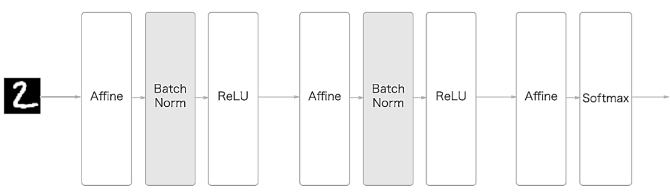
 <BR>
     미니배치를 단위로 정규화한다. <BR>
     - 데이터 분포가 평균이 0 , 분산이 1이 되도록 정규화 <BR>
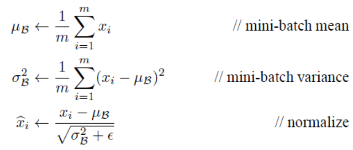<BR>
     ε =  아주 작은 값( 0으로 나누는 사태를 예방하기 위해 ) <BR>
     <BR>
     - 이 함수를 활성화함수의 앞 혹은 뒤에 삽입하여 데이터 분포가 덜 치우치게 할 수 있다. <BR>
         또한 배치 정규화 계층마다 이 정규화된 데이터에 고유한 확대와 이동 변환을 수행<BR>
         

6.3.2 배치 정규화의 효과 <BR>
    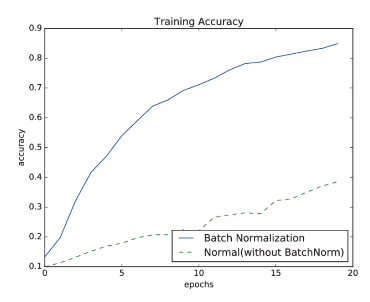<BR>
    - 가중치 초깃값의 표준편차를 다양하게 바꿔가며 학습 경과를 관찰한 그래프이다. <br>
    - 배치 정규화가 학습 속도를 높인 것을 확인<br>
    - 여러 장점이 많아서 앞으로 다양한 분야에서 활약할 것 

<h3> 6.4 바른 학습을 위해 </h3>
오버피팅 : 신경망이 훈련 데이터에만 지나치게 적응되어 그 외의 데이터에는 제대로 대응하지 못하는 상태 <br>
> 기계학습은 범용 성능을 지향 

6.4.1 오버피팅 <br>
오버피팅은 주로 다음의 두 경우에 일어남<br>
1. 매개변수가 많고 표현력이 높은 모델 <br>
2. 훈련 데이터가 적음 

6.4.2 가중치 감소 <br>
학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 페널티를 부과하여 오버피팅을 억제하는 방법 <br>
- 원래 오버피팅은 가중치 매개변수의 값이 커서 발생하는 경우가 많기 때문<br>
<br>
note : 정규화 항으로 L2노름,L1노름,L무한 노름 중 어떤 것도 사용할 수있다. <Br>
   - 각자 특징이 있다.

In [30]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class MultiLayerNet:
    """완전연결 다층 신경망

    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    weight_decay_lambda : 가중치 감소(L2 법칙)의 세기
    """
    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.weight_decay_lambda = weight_decay_lambda
        self.params = {}

        # 가중치 초기화
        self.__init_weight(weight_init_std)

        # 계층 생성
        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
            self.params['b' + str(idx)])

        self.last_layer = SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        """가중치 초기화
        
        Parameters
        ----------
        weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
            'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
            'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
        """
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])  # ReLU를 사용할 때의 권장 초깃값
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])  # sigmoid를 사용할 때의 권장 초깃값
            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.
        
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블 
        
        Returns
        -------
        손실 함수의 값
        """
        y = self.predict(x)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        """기울기를 구한다(수치 미분).
        
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        
        Returns
        -------
        각 층의 기울기를 담은 딕셔너리(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = numerical_gradient(loss_W, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_W, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        
        Returns
        -------
        각 층의 기울기를 담은 딕셔너리(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.layers['Affine' + str(idx)].W
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

        return grads


epoch:0, train acc:0.06666666666666667, test acc:0.0807
epoch:1, train acc:0.08333333333333333, test acc:0.093
epoch:2, train acc:0.11, test acc:0.1135
epoch:3, train acc:0.13666666666666666, test acc:0.1422
epoch:4, train acc:0.18, test acc:0.1598
epoch:5, train acc:0.24, test acc:0.1847
epoch:6, train acc:0.2866666666666667, test acc:0.2043
epoch:7, train acc:0.31666666666666665, test acc:0.2271
epoch:8, train acc:0.35, test acc:0.2536
epoch:9, train acc:0.39666666666666667, test acc:0.2767
epoch:10, train acc:0.4033333333333333, test acc:0.2845
epoch:11, train acc:0.4166666666666667, test acc:0.2978
epoch:12, train acc:0.46, test acc:0.3197
epoch:13, train acc:0.48333333333333334, test acc:0.3329
epoch:14, train acc:0.48333333333333334, test acc:0.336
epoch:15, train acc:0.51, test acc:0.3509
epoch:16, train acc:0.5066666666666667, test acc:0.3685
epoch:17, train acc:0.53, test acc:0.3797
epoch:18, train acc:0.5466666666666666, test acc:0.3843
epoch:19, train acc:0.5666666666666667,

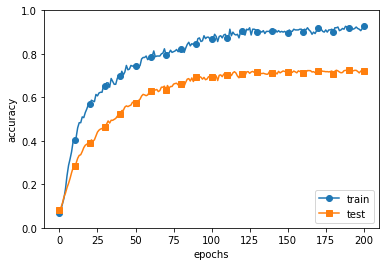

In [31]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


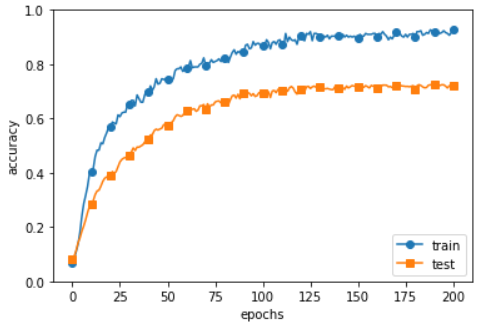 <BR>
오버피팅이 억제된 것을 확인 <BR>
또한 훈련데이터 정확도가 100%가 안된 것도 주목해야될 점이다. <BR>

6.4.3 드롭아웃 <BR>
    - 신경망 모델이 복잡해지면 가중치 감소만으로는 대응하기 어려워진다. <BR>
    > 그래서 드롭아웃 기법을 이용 <BR>
<BR>
    드롭아웃 : 뉴런을 임의로 삭제하면서 학습하는 방법 <BR>
    - 훈련 때 은닉층의 뉴런을 무작위로 골라 삭제하고 시험 때는 모든 뉴런에 신호를 전달 <BR>
    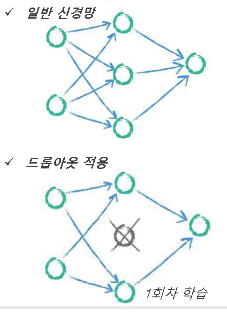

In [32]:
# 드롭아웃 구현
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
    
    def forward(self, x, train_flg = True): #순전파 train_flg = true가 중요 
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            # mask는 x와 형상이 같은 배열을 무작위 생성
            # dropout_ratio보다 큰 값만 true 한다. 
            # 삭제할 뉴런은 false
            return x* self.mask
        else:
            return x *(1.0 - self.dropout_ratio)
    
    def backward(self, dout): # 역전파 ReLU랑 같다.
        return dout * self.mask

train loss:2.3051657750466443
=== epoch:1, train acc:0.06, test acc:0.0727 ===
train loss:2.3061959792837516
train loss:2.3039047876942336
train loss:2.304518202587232
=== epoch:2, train acc:0.06333333333333334, test acc:0.074 ===
train loss:2.296717894916325
train loss:2.3124522957267653
train loss:2.293892646224791
=== epoch:3, train acc:0.06, test acc:0.0782 ===
train loss:2.291983919212443
train loss:2.298322176646978
train loss:2.2879138137762056
=== epoch:4, train acc:0.06333333333333334, test acc:0.0849 ===
train loss:2.29356977734445
train loss:2.297592127156435
train loss:2.2887853248029044
=== epoch:5, train acc:0.07333333333333333, test acc:0.0893 ===
train loss:2.3028326288435492
train loss:2.2980500022745947
train loss:2.295203218977847
=== epoch:6, train acc:0.07666666666666666, test acc:0.0942 ===
train loss:2.3079161159647317
train loss:2.2928114223287914
train loss:2.284414433787293
=== epoch:7, train acc:0.08333333333333333, test acc:0.1066 ===
train loss:2.2921671817

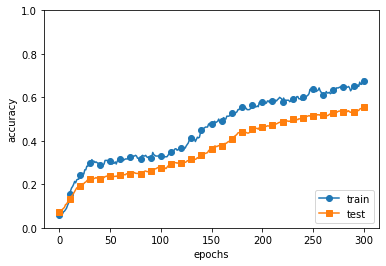

In [33]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

mnist 데이터 셋으로 확인 <br>
- 7층 네트워크(각 층의 뉴런수 100개 , 활성화함수 ReLU)<br>
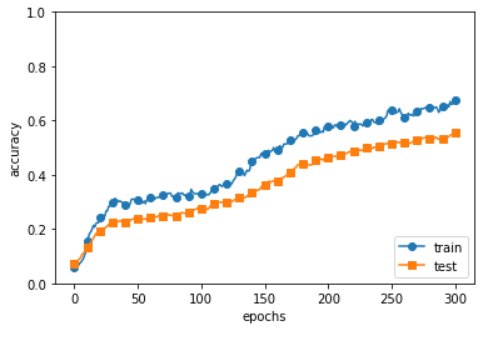 <br>
결과로 훈련 데이터와 시험데이터에 대한 정확도 차이가 줄었다. <br>
또한 훈련 데이터에 대한 정확도가 100%에 도달하지 않음

note : <br>
기계학습에서는 <b>앙상블 학습</b>을 애용함 <br>
앙상블 학습 = 개별적으로 학습시킨 여러 모델의 출력을 평균 내어 추론하는 방식 <br>
이 방식은 신경망의 정확도가 개선된다는 것이 실험적으로 알려져 있다. <br>
앙상블 학습은 드롭아웃과 밀접하다. <br>
드롭아웃은 뉴런을 무작위로 삭제하여 매번 다른 모델을 학습시키는 것으로 해석 가능 
드롭아웃은 앙상블 학습과 같은 효과를 하나의 네트워크로 구현했다고 생각할 수 있다. 

<h3> 6.5 적절한 하이퍼파라미터 값 찾기 </h3>
- 하이퍼파라미터의 값을 결정하기까지는 일반적으로 많은 시행착오를 겪는다.

6.5.1 검증 데이터 <br>
- 하이퍼파라미터의 성능을 평가할 때는 시험 데이터를 사용해서는 안된다. <br>
- 하이퍼파라미터 값을 조정하여 시험 데이터에만 적합하도록 오버피팅이 될 수 있다 .<br>
note: <br>
1. 훈련 데이터 : 매개변수 학습<br>
2. 검증 데이터 : 하이퍼파라미터 성능 평가 <br>
3. 시험 데이터 : 신경망의 범용 성능 평가 <br>

<br>
훈련 데이터 중 20% 정도를 검증데이터로 잡는 것이 좋다. <br>

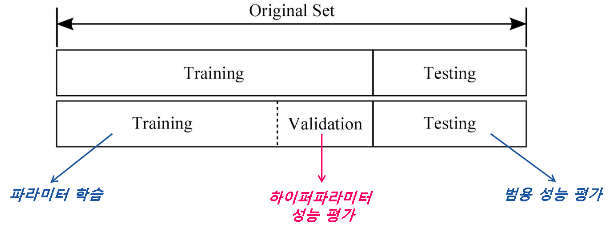

In [37]:
def shuffle_dataset(x, t):
    """데이터셋을 뒤섞는다.

    Parameters
    ----------
    x : 훈련 데이터
    t : 정답 레이블
    
    Returns
    -------
    x, t : 뒤섞은 훈련 데이터와 정답 레이블
    """
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t



(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터 를 뒤섞는다. 
x_train, t_train = shuffle_dataset(x_train,t_train)

# 20%를 검증데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0]* validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

6.5.2 하이퍼파라미터 최적화 <br>
note : <br>
- 그리드서치 같은 규칙적인 탐색보다는 무작위로 샘플링해 탐색하는 펴이 좋은 결과를 낸다. <br>

0단계 :<br>
- 하이퍼파라미터 값의 범위를 설정한다. (보통 0.001~1000 10거듭제곱 단위로 함) <br>

1단계 :<br>
- 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출한다<br>

2단계 :<br>
- 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증데이터로 정확도를 평가 (단, 에폭은 작게) <br>

3단계 :<br>
- 1단계와 2단계를 특정 횟수(100회 등) 반복하며, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힌다. <br>

> 어느 정도 좁아지면 그 압축한 범위에서 값을 하나 골라냄

note: <br>
더 세련된 기법은 베이즈 최적화가 있다. <br>
- 베이즈 정리를 중심으로 한 수학 이론을 구사하여 더 엄밀하고 효율적으로 최적화를 수행

6.5.3 하이퍼파라미터 최적화 구현 <br>

In [38]:
# 하이퍼파라미터의 무작위 추출코드
weight_decay = 10**np.random.uniform(-8,-4) 
lr = 10**np.random.uniform(-6,-2)

무작위로 추출한 값을 사용하여 학습을 수행한다. <br>
그 후 여러차례 다양한 하이퍼파라미터 값으로 학습을 반복하여 신경망에 좋을 것 같은 값이 어디에 존재하는지 관찰 
<br>

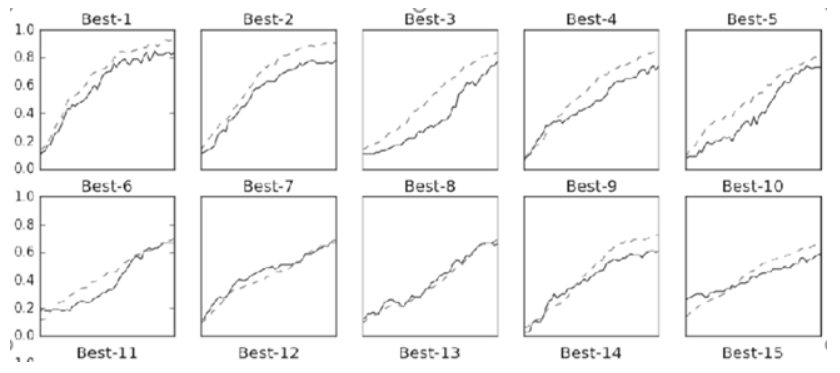<br>

best-1 :<br>
lr = 0.0092 , weight decay : 3.86e-07

<h3> 6.6 정리 </h3>
- 매개변수 갱신 방법에는 확률적 경사 하강법(SGD) 외에는 모멘텀, AdaGrad, Adam 등이 있다. <br>
- 가중치 초깃값을 정하는 방법은 올바른 학습을 하는데 매우 중요하다. <br>
- 가중치의 초깃값으로는 'Xavier 초깃값'과 'He 초깃값'이 효과적이다. <br>
- 배치 정규화를 이용하면 학습을 빠르게 진행할 수 있으며, 초깃값에 영향을 덜 받게 된다. <br>
- 오버피팅을 억제하는 정규화 기술로는 가중치 감소와 드롭아웃이 있다.<br>
- 하이퍼파라미터 값 탐색은 최적 값이 존재할 법한 범위를 저마 좁히면서 하는 것이 효과적이다. 